<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/notebooks/analise_conjunto_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do conjunto teste

Neste notebook será feito uma avaliação do modelo avaliando o seu desempenho no conjunto teste

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [ ]:
def metricas(y_teste,y_pred):
  print('R2 Score',r2_score(y_teste,y_pred))
  print('MAE',mean_absolute_error(y_teste,y_pred))
  print('RMSE',np.sqrt(mean_squared_error(y_teste,y_pred)))
  print('MAPE',mean_absolute_percentage_error(y_teste,y_pred))
  print('RMSLE',mean_squared_log_error(y_teste,y_pred,squared=False))

In [ ]:
teste = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de resultados_test.csv')
teste.drop(['Unnamed: 0','date','stock'],axis=1,inplace=True)
teste.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,log_price,y_pred
0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198
1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",strapless backless push up lace up cupd No Bra...,2.397895,15.948566
2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917
3,dermalogica gift set,Beauty,Makeup,Makeup Sets,1,No Brand,19.0,1,Brand new Authentic Includes: special cleansin...,dermalogica gift set No Brand Brand new Authen...,2.944439,50.830850
4,reserved for monica only,Women,Shoes,Athletic,2,Nike,12.0,0,DO NOT PURCHASE THIS LISTING UNLESS YOU ARE MO...,reserved for monica only Nike DO NOT PURCHASE ...,2.484907,51.066772


In [ ]:
# criando uma coluna da variação da estimativa com o preço real
teste['dif']  = np.abs(teste['y_pred']-teste['price'])

In [ ]:
teste.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,log_price,y_pred,dif
0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198,0.789802
1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",strapless backless push up lace up cupd No Bra...,2.397895,15.948566,4.948566
2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917,4.958917
3,dermalogica gift set,Beauty,Makeup,Makeup Sets,1,No Brand,19.0,1,Brand new Authentic Includes: special cleansin...,dermalogica gift set No Brand Brand new Authen...,2.944439,50.830850,31.830850
4,reserved for monica only,Women,Shoes,Athletic,2,Nike,12.0,0,DO NOT PURCHASE THIS LISTING UNLESS YOU ARE MO...,reserved for monica only Nike DO NOT PURCHASE ...,2.484907,51.066772,39.066772


In [ ]:
metricas(teste.price,teste.y_pred)

R2 Score 0.5544486516453371
MAE 9.653950825533121
RMSE 25.836853597896393
MAPE 0.37026476364704186
RMSLE 0.4330107018774164


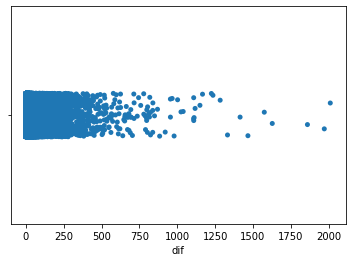

In [ ]:
sns.stripplot(x='dif',data=teste)

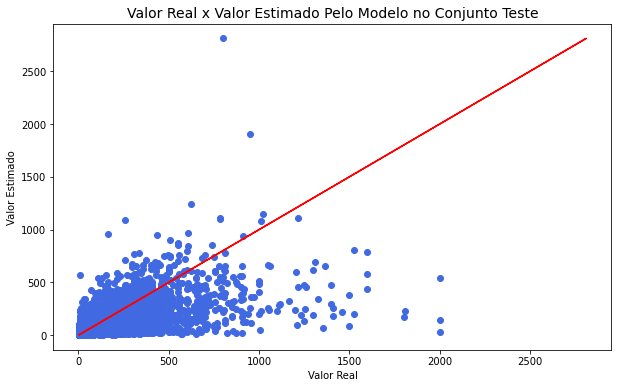

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Valor Real x Valor Estimado Pelo Modelo no Conjunto Teste',
          fontsize=14)
plt.plot(teste.y_pred,teste.y_pred,color='red')
plt.scatter(teste.price,teste.y_pred,color='royalblue')
plt.xlabel('Valor Real')
plt.ylabel('Valor Estimado');

Separação pelo cluster no preço

In [ ]:
cluster = []
for i in teste.price:
  if i >= 3 and i <= 42:
    cluster.append(0)
  elif i >= 42.5 and i <= 141:
    cluster.append(1)
  elif i >= 142 and i <= 481:
    cluster.append(3)
  elif i >= 484:
    cluster.append(2)

In [ ]:
teste['cluster'] = cluster
teste.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,log_price,y_pred,dif,cluster
0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198,0.789802,0
1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",strapless backless push up lace up cupd No Bra...,2.397895,15.948566,4.948566,0
2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917,4.958917,0
3,dermalogica gift set,Beauty,Makeup,Makeup Sets,1,No Brand,19.0,1,Brand new Authentic Includes: special cleansin...,dermalogica gift set No Brand Brand new Authen...,2.944439,50.830850,31.830850,0
4,reserved for monica only,Women,Shoes,Athletic,2,Nike,12.0,0,DO NOT PURCHASE THIS LISTING UNLESS YOU ARE MO...,reserved for monica only Nike DO NOT PURCHASE ...,2.484907,51.066772,39.066772,0


In [ ]:
teste['cluster'].value_counts()

0    344827
1     49291
3      5593
2       338
Name: cluster, dtype: int64

In [ ]:
cl = []
for j in teste['cluster'].value_counts().index:
  cl.append(f'cluster {j}')

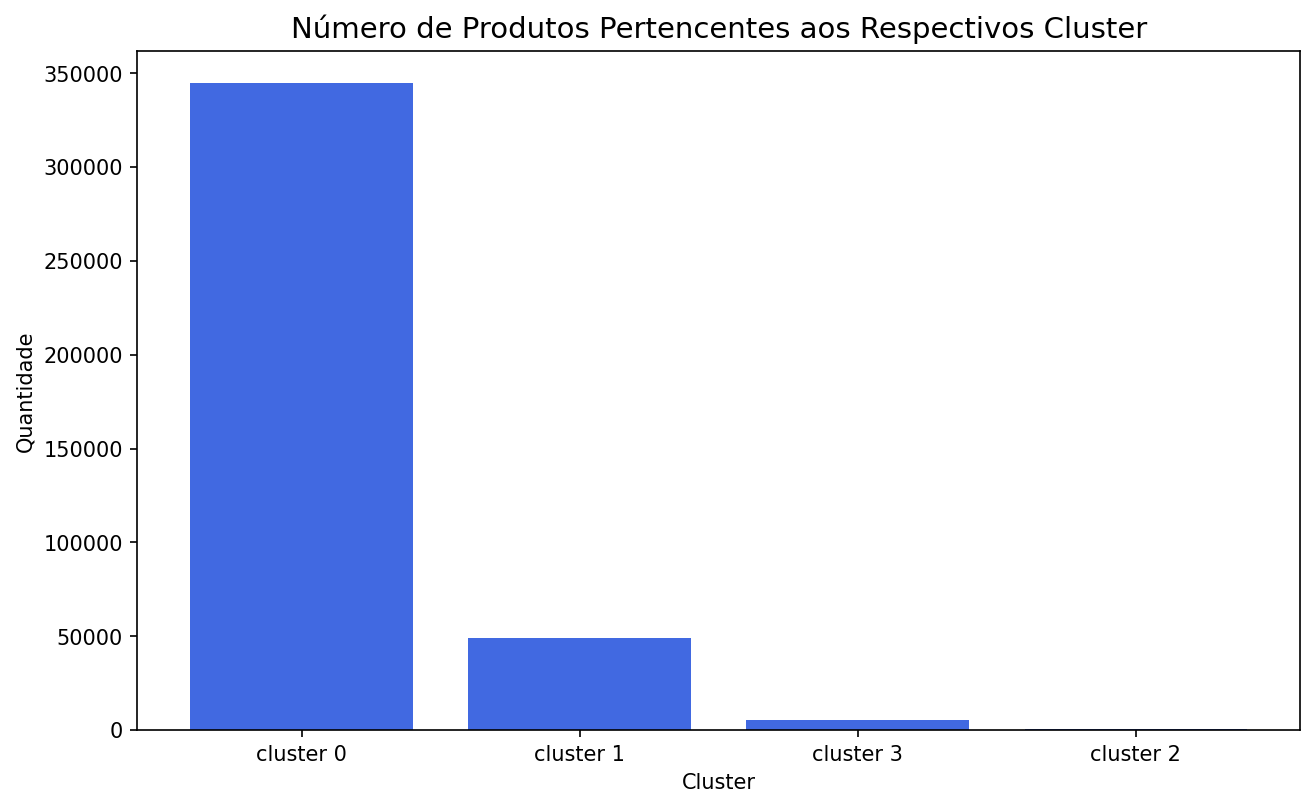

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Número de Produtos Pertencentes aos Respectivos Cluster',
          fontsize=14)
plt.bar(cl,teste['cluster'].value_counts(),color='royalblue')
plt.xlabel('Cluster')
plt.ylabel('Quantidade');

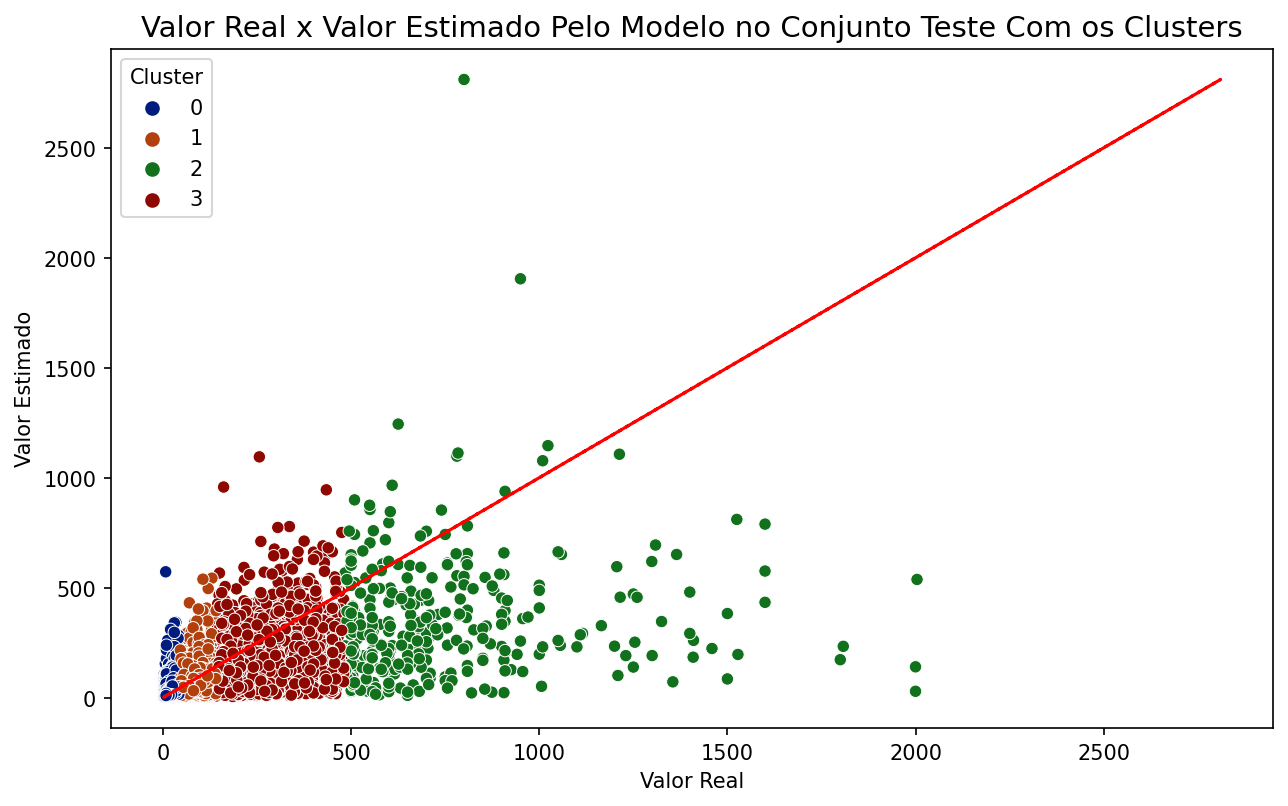

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Valor Real x Valor Estimado Pelo Modelo no Conjunto Teste Com os Clusters',
          fontsize=14)
plt.plot(teste.y_pred,teste.y_pred,color='red')
sns.scatterplot(x='price',y='y_pred',data=teste,hue='cluster',
                palette='dark')
plt.xlabel('Valor Real')
plt.ylabel('Valor Estimado')
plt.legend(title='Cluster');

In [ ]:
metricas(teste[teste['cluster']!=2]['price'],teste[teste['cluster']!=2]['y_pred'])

R2 Score 0.5833915278470794
MAE 9.28493702880256
RMSE 20.338905922678666
MAPE 0.37009435922389966
RMSLE 0.4314495645373481


In [ ]:
estimativa = []
for o in teste.dif:
  if o <= 10:
    estimativa.append('boa')
  elif o > 10 and o <= 35:
    estimativa.append('na média')
  else:
    estimativa.append('ruim')

In [ ]:
teste['estimativa'] = estimativa

In [ ]:
teste.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,log_price,y_pred,dif,cluster,estimativa
0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198,0.789802,0,boa
1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",strapless backless push up lace up cupd No Bra...,2.397895,15.948566,4.948566,0,boa
2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917,4.958917,0,boa
3,dermalogica gift set,Beauty,Makeup,Makeup Sets,1,No Brand,19.0,1,Brand new Authentic Includes: special cleansin...,dermalogica gift set No Brand Brand new Authen...,2.944439,50.830850,31.830850,0,na média
4,reserved for monica only,Women,Shoes,Athletic,2,Nike,12.0,0,DO NOT PURCHASE THIS LISTING UNLESS YOU ARE MO...,reserved for monica only Nike DO NOT PURCHASE ...,2.484907,51.066772,39.066772,0,ruim


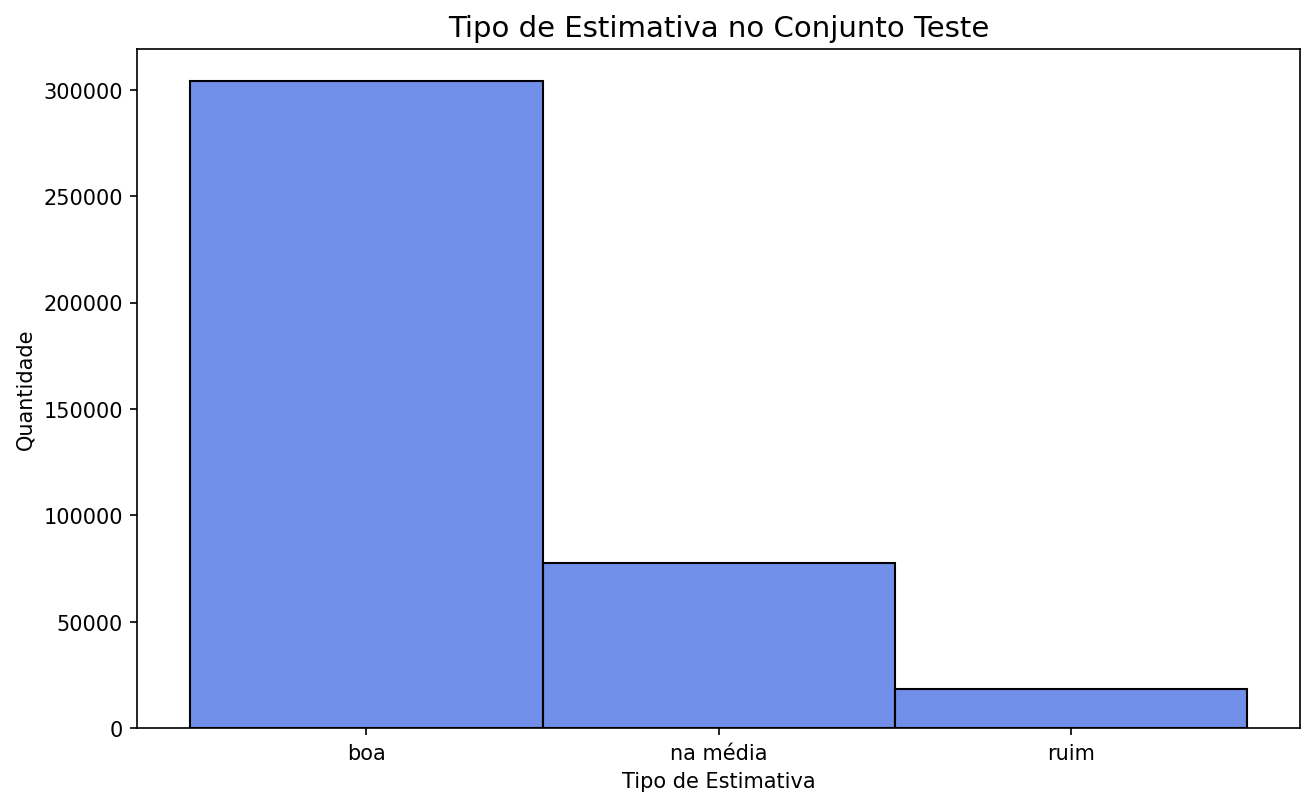

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa no Conjunto Teste',fontsize=14)
sns.histplot(x='estimativa',data=teste,color='royalblue')
plt.xlabel('Tipo de Estimativa')
plt.ylabel('Quantidade');

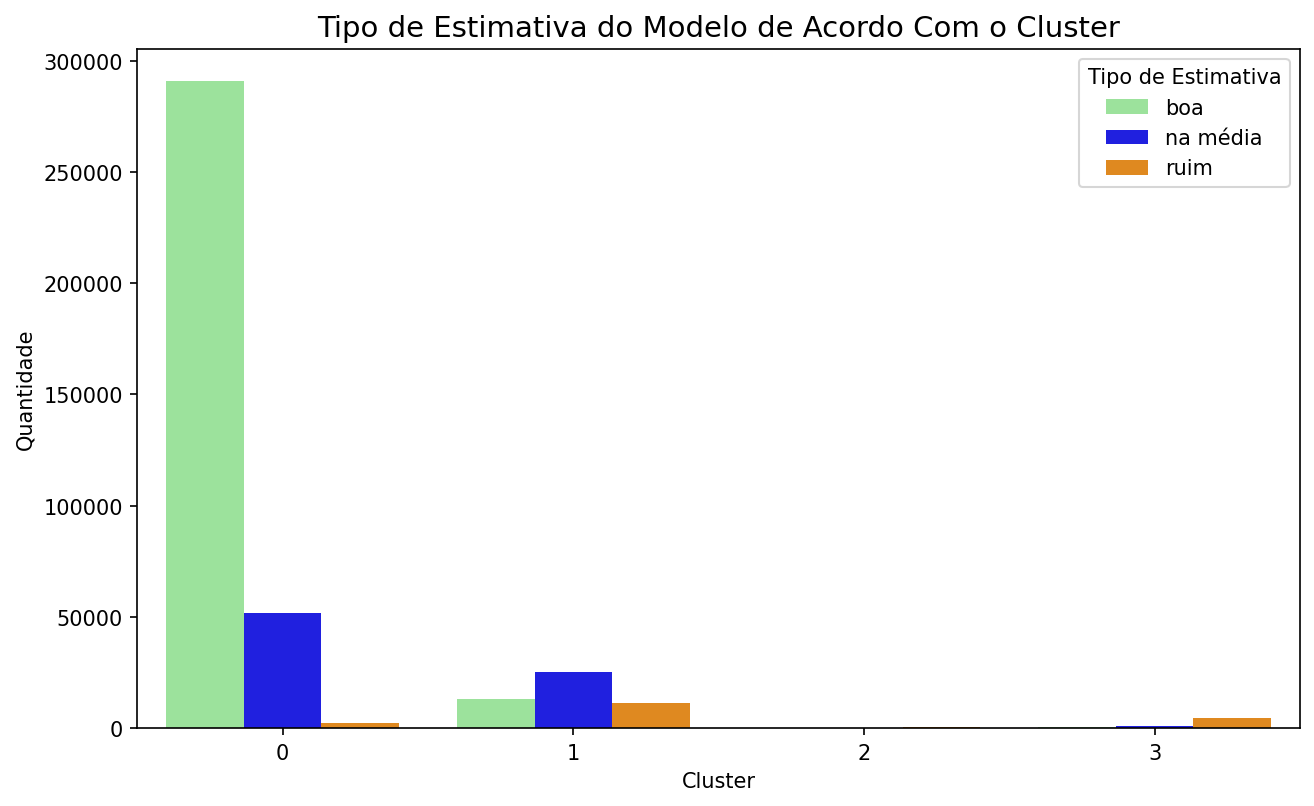

In [124]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa do Modelo de Acordo Com o Cluster',fontsize=14)
sns.countplot(x='cluster',data=teste,hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'])
plt.xlabel('Cluster')
plt.ylabel('Quantidade')
plt.legend(title='Tipo de Estimativa');

In [ ]:
teste[teste['estimativa']=='boa']['brand_name'].value_counts()[0:20]

No Brand             136473
PINK                  11332
Nike                  10623
Victoria's Secret     10234
LuLaRoe                5857
FOREVER 21             3780
American Eagle         3325
Apple                  2761
Sephora                2644
Nintendo               2616
Bath & Body Works      2397
Disney                 2336
Lululemon              2249
Rae Dunn               2084
Under Armour           1970
Old Navy               1953
Adidas                 1844
Hollister              1738
Funko                  1636
Michael Kors           1579
Name: brand_name, dtype: int64

<BarContainer object of 20 artists>

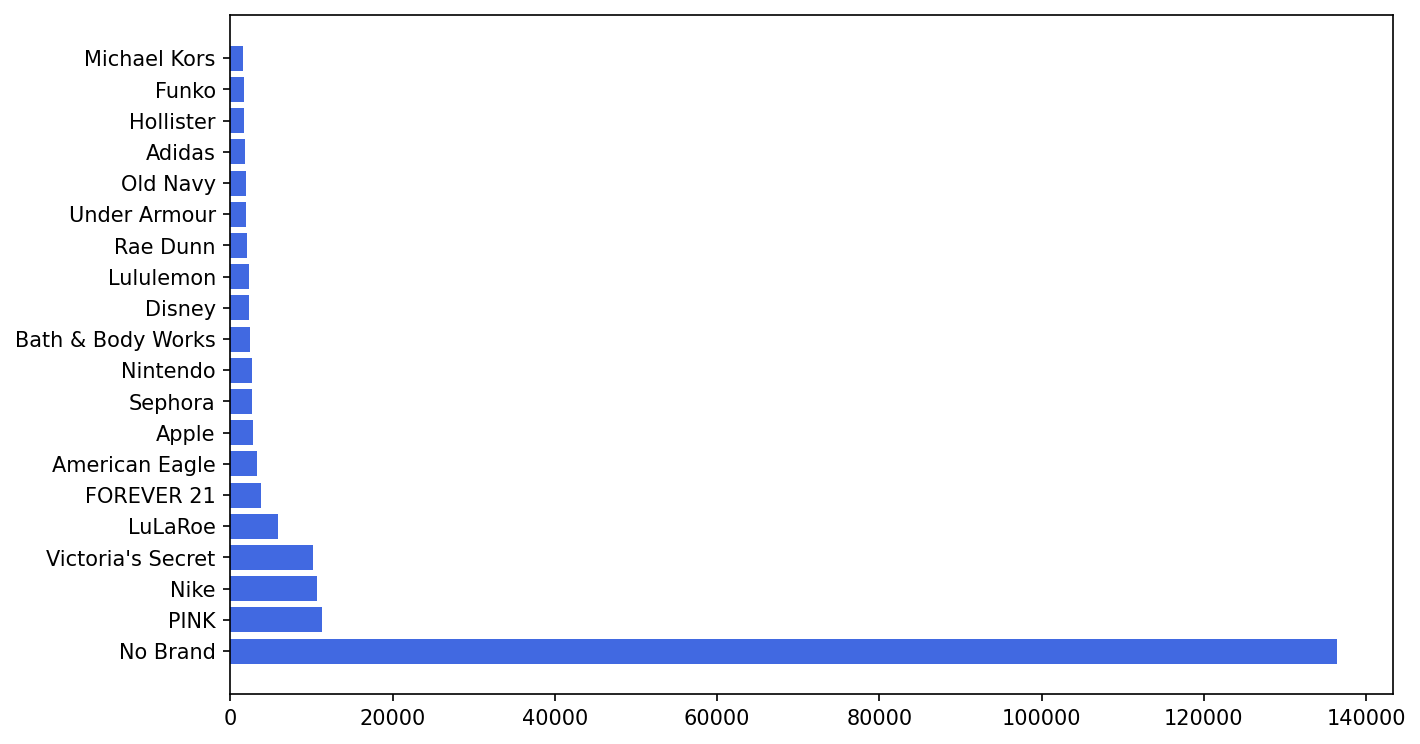

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.barh(teste[teste['estimativa']=='boa']['brand_name'].value_counts().index[0:20],
         teste[teste['estimativa']=='boa']['brand_name'].value_counts()[0:20],color='royalblue')

In [ ]:
teste[teste['estimativa']=='na média']['brand_name'].value_counts()[0:20]

No Brand             28436
Nike                  3551
PINK                  2807
Victoria's Secret     2325
LuLaRoe               2223
Michael Kors          1584
Lululemon             1438
Nintendo              1072
Coach                 1033
Rae Dunn              1014
Apple                  959
Adidas                 754
Funko                  705
Sephora                641
UGG Australia          591
The North Face         577
Kendra Scott           575
Sony                   552
Kate Spade             537
Independent            476
Name: brand_name, dtype: int64

<BarContainer object of 20 artists>

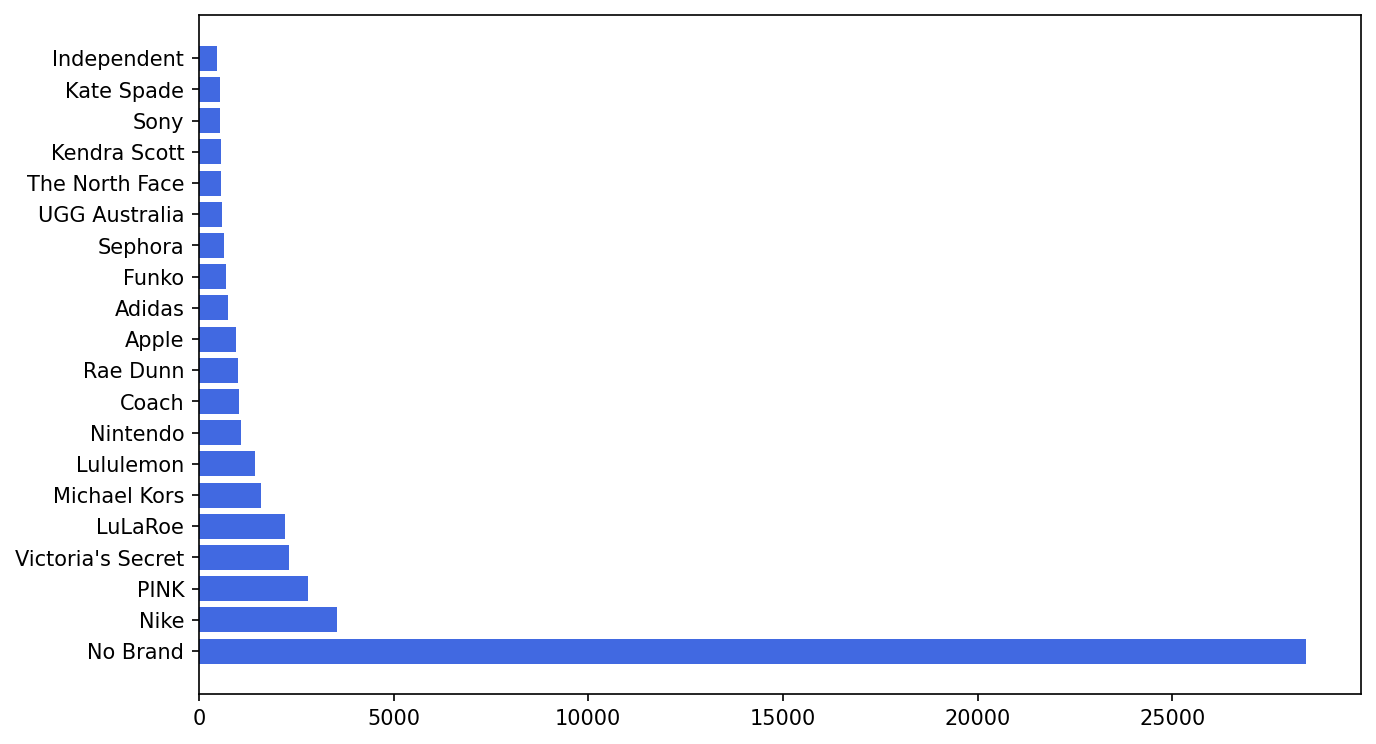

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.barh(teste[teste['estimativa']=='na média']['brand_name'].value_counts().index[0:20],
         teste[teste['estimativa']=='na média']['brand_name'].value_counts()[0:20],color='royalblue')

In [ ]:
teste[teste['estimativa']=='ruim']['brand_name'].value_counts()[0:20]

No Brand             5732
Apple                 923
Michael Kors          585
Nike                  541
Louis Vuitton         485
PINK                  411
Nintendo              352
Air Jordan            329
Coach                 282
Victoria's Secret     272
Lululemon             265
Adidas                258
Rae Dunn              250
Kendra Scott          244
LuLaRoe               236
Tory Burch            235
Kate Spade            231
Samsung               201
Sony                  193
Gucci                 186
Name: brand_name, dtype: int64

<BarContainer object of 20 artists>

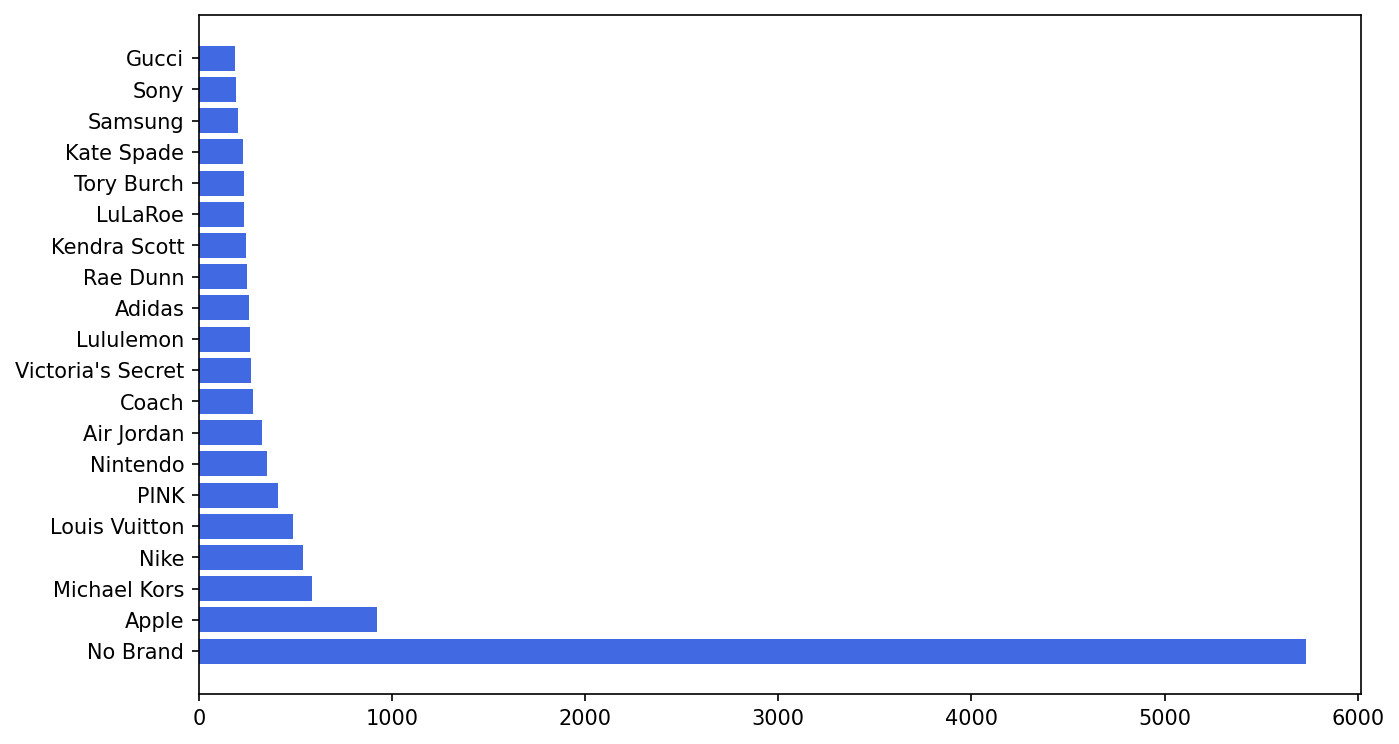

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.barh(teste[teste['estimativa']=='ruim']['brand_name'].value_counts().index[0:20],
         teste[teste['estimativa']=='ruim']['brand_name'].value_counts()[0:20],color='royalblue')

Categoria geral

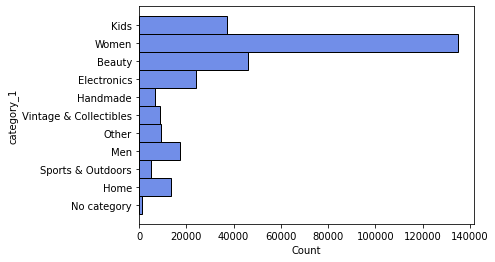

In [ ]:
sns.histplot(y='category_1',data=teste[teste['estimativa']=='boa'],
             color='royalblue')

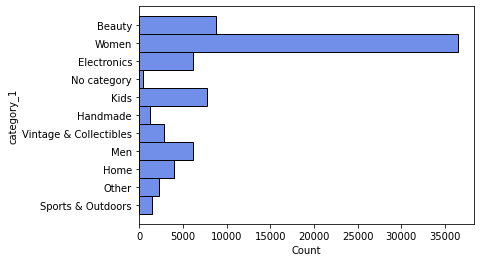

In [ ]:
sns.histplot(y='category_1',data=teste[teste['estimativa']=='na média'],color='royalblue')

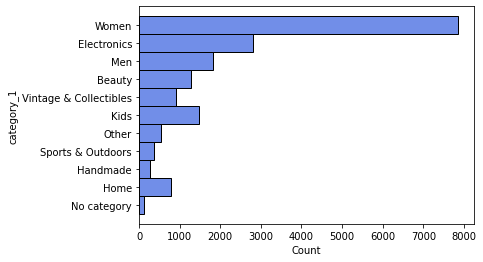

In [ ]:
sns.histplot(y='category_1',data=teste[teste['estimativa']=='ruim'],color='royalblue')

Categoria Women

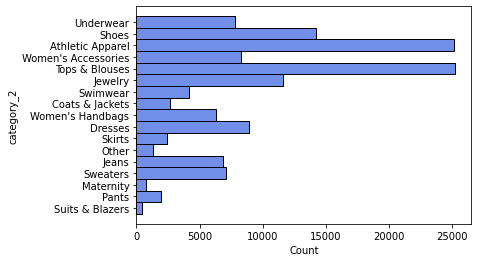

In [ ]:
sns.histplot(y='category_2',data=teste[(teste['estimativa']=='boa')&(teste['category_1']=='Women')],
             color='royalblue')

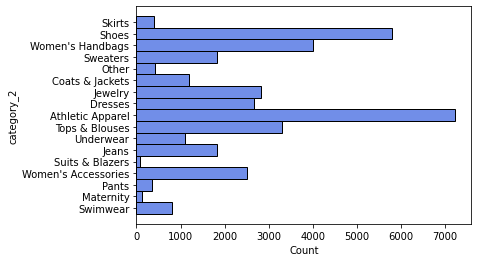

In [ ]:
sns.histplot(y='category_2',data=teste[(teste['estimativa']=='na média')&(teste['category_1']=='Women')],
             color='royalblue')

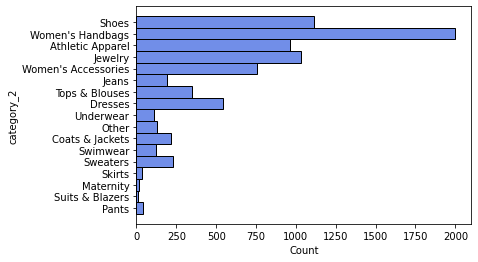

In [ ]:
sns.histplot(y='category_2',data=teste[(teste['estimativa']=='ruim')&(teste['category_1']=='Women')],
            color='royalblue')

Categoria Eletronics

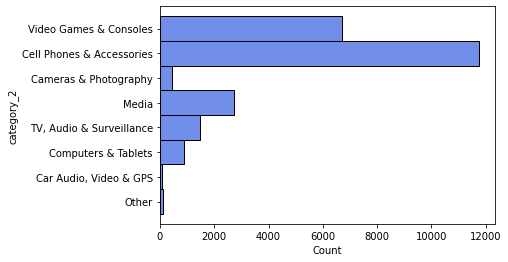

In [ ]:
sns.histplot(y='category_2',data=teste[(teste['estimativa']=='boa')&(teste['category_1']=='Electronics')],
             color='royalblue')

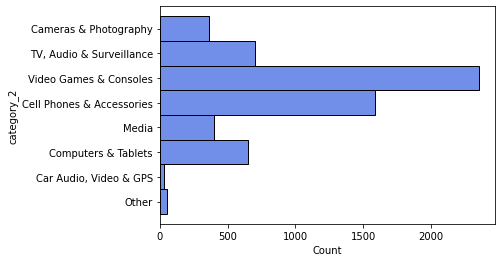

In [ ]:
sns.histplot(y='category_2',data=teste[(teste['estimativa']=='na média')&(teste['category_1']=='Electronics')],
             color='royalblue')

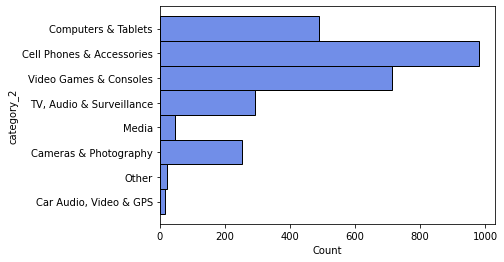

In [ ]:
sns.histplot(y='category_2',data=teste[(teste['estimativa']=='ruim')&(teste['category_1']=='Electronics')],
             color='royalblue')

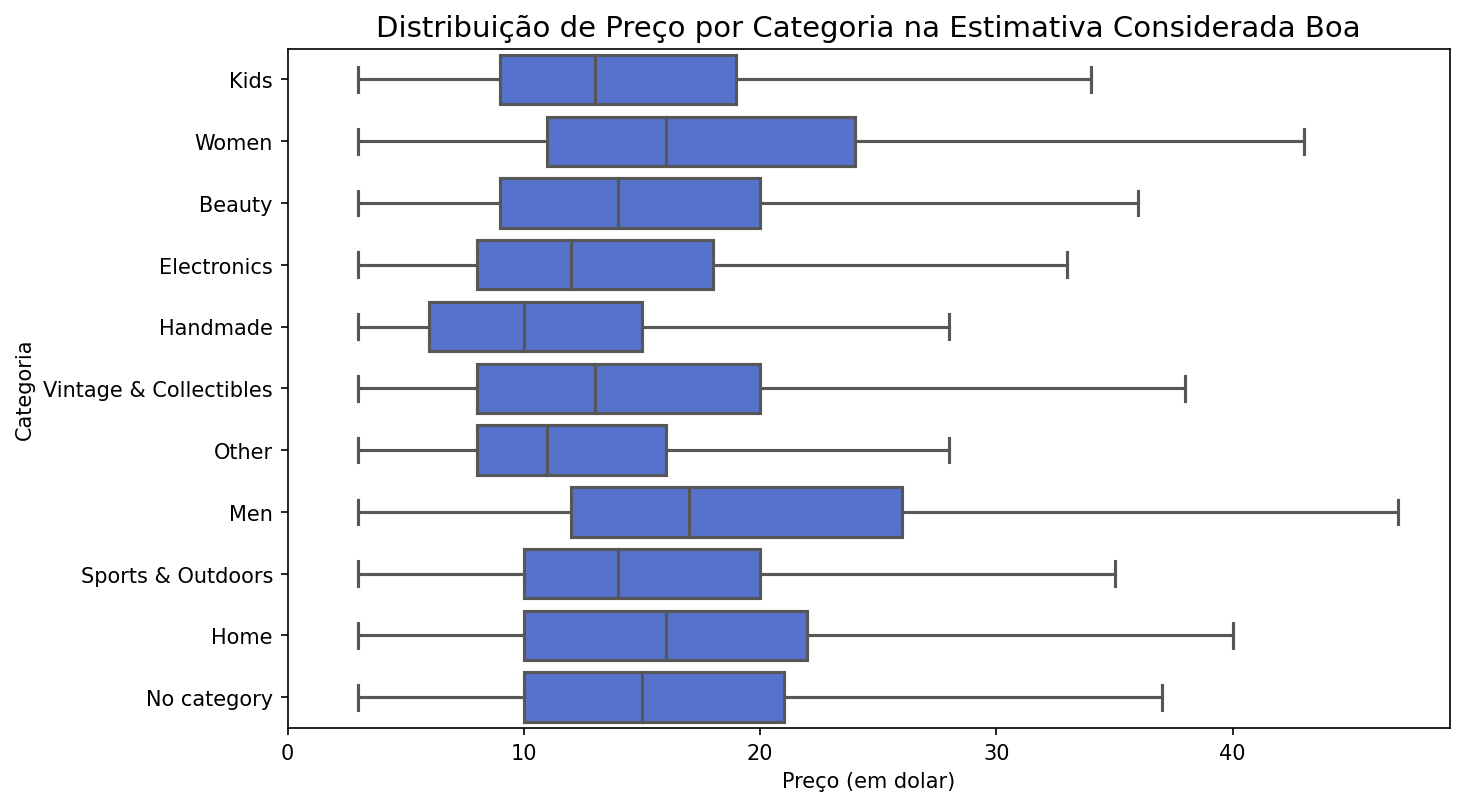

In [77]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição de Preço por Categoria na Estimativa Considerada Boa',
          fontsize=14)
sns.boxplot(x='price',y='category_1',data=teste[teste['estimativa']=='boa'],color='royalblue',
            showfliers = False)
plt.xlabel('Preço (em dolar)')
plt.ylabel('Categoria')
plt.xlim(left=0);

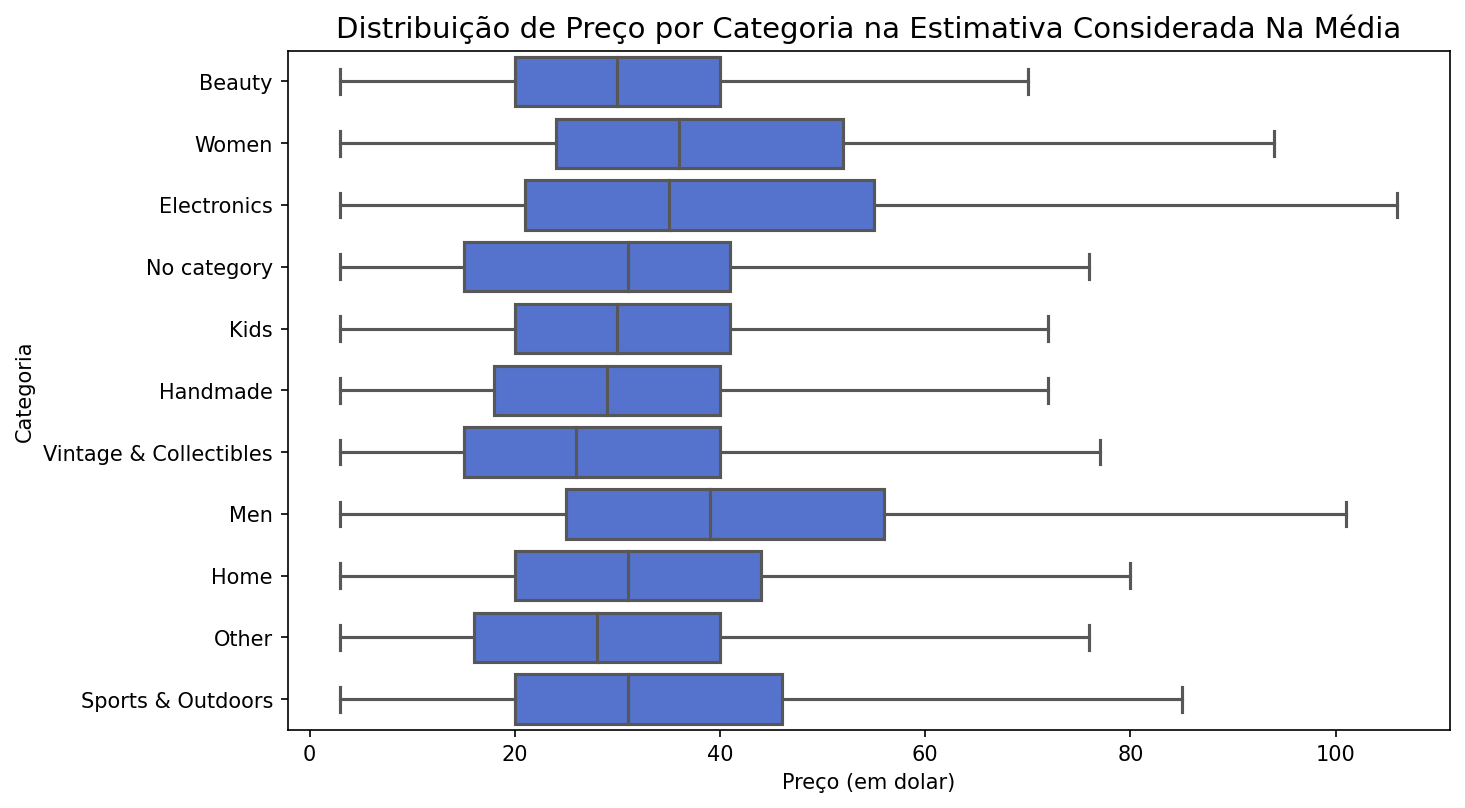

In [78]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição de Preço por Categoria na Estimativa Considerada Na Média',
          fontsize=14)
sns.boxplot(x='price',y='category_1',data=teste[teste['estimativa']=='na média'],color='royalblue',
            showfliers = False)
plt.xlabel('Preço (em dolar)')
plt.ylabel('Categoria');


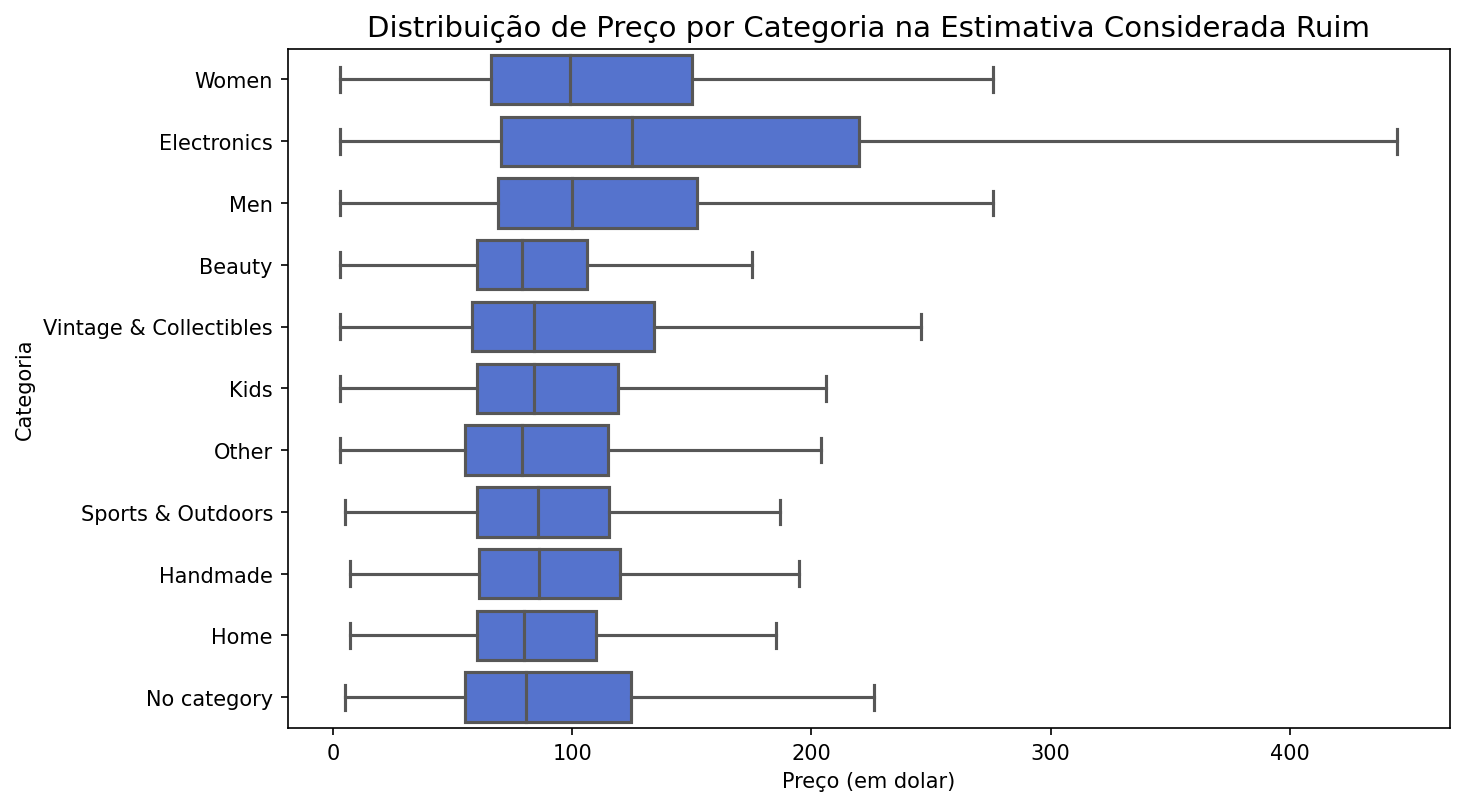

In [80]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Distribuição de Preço por Categoria na Estimativa Considerada Ruim',
          fontsize=14)
sns.boxplot(x='price',y='category_1',data=teste[teste['estimativa']=='ruim'],color='royalblue',
            showfliers = False)
plt.xlabel('Preço (em dolar)')
plt.ylabel('Categoria');

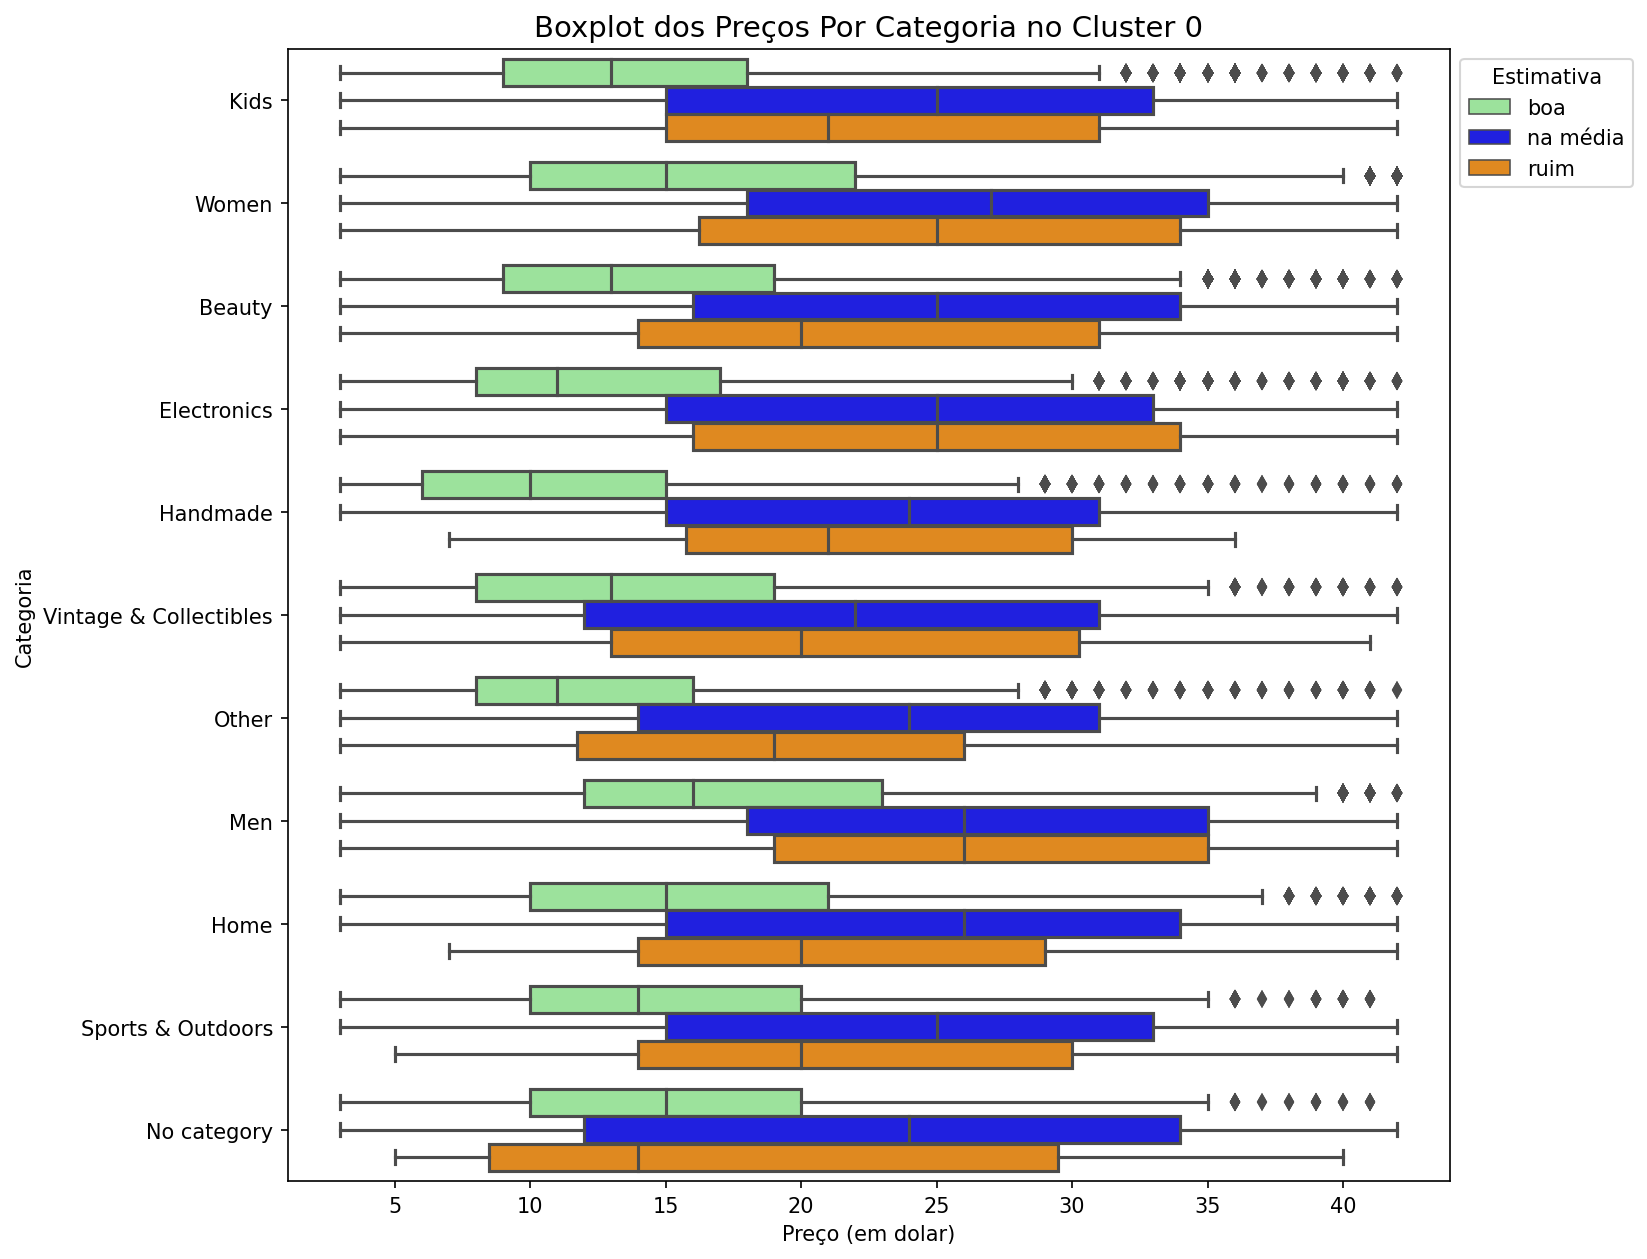

In [115]:
plt.figure(figsize=(10,10),dpi=150)

ax = sns.boxplot(x='price',y='category_1',data=teste[teste['cluster']==0],
            hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'])
ax.set_title('Boxplot dos Preços Por Categoria no Cluster 0',fontsize=14)
ax.set_xlabel('Preço (em dolar)')
ax.set_ylabel('Categoria')
ax.legend(title='Estimativa')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

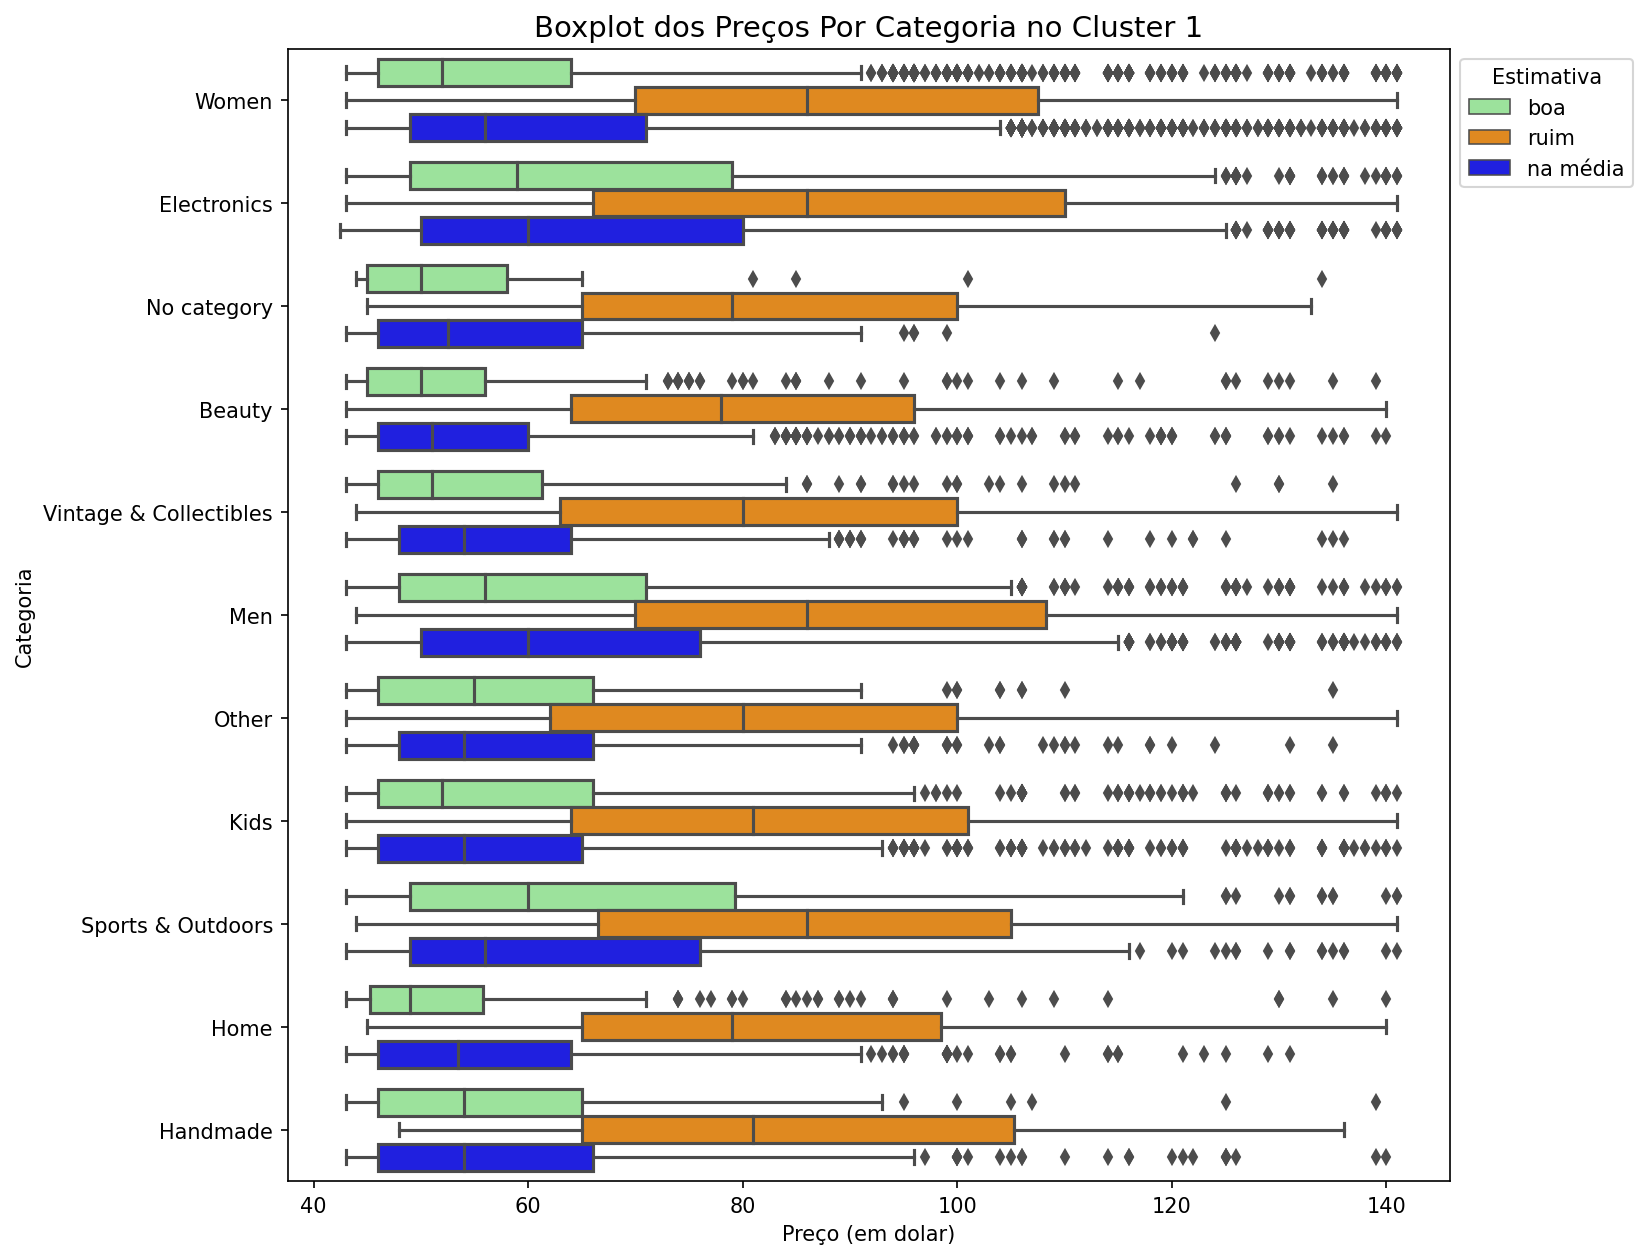

In [118]:
plt.figure(figsize=(10,10),dpi=150)
ax1 = sns.boxplot(x='price',y='category_1',data=teste[teste['cluster']==1],
            hue='estimativa',palette=['#90ee90','#ff8c00','#0000ff'])
ax1.set_title('Boxplot dos Preços Por Categoria no Cluster 1',fontsize=14)
ax1.set_xlabel('Preço (em dolar)')
ax1.set_ylabel('Categoria')
ax1.legend(title='Estimativa')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

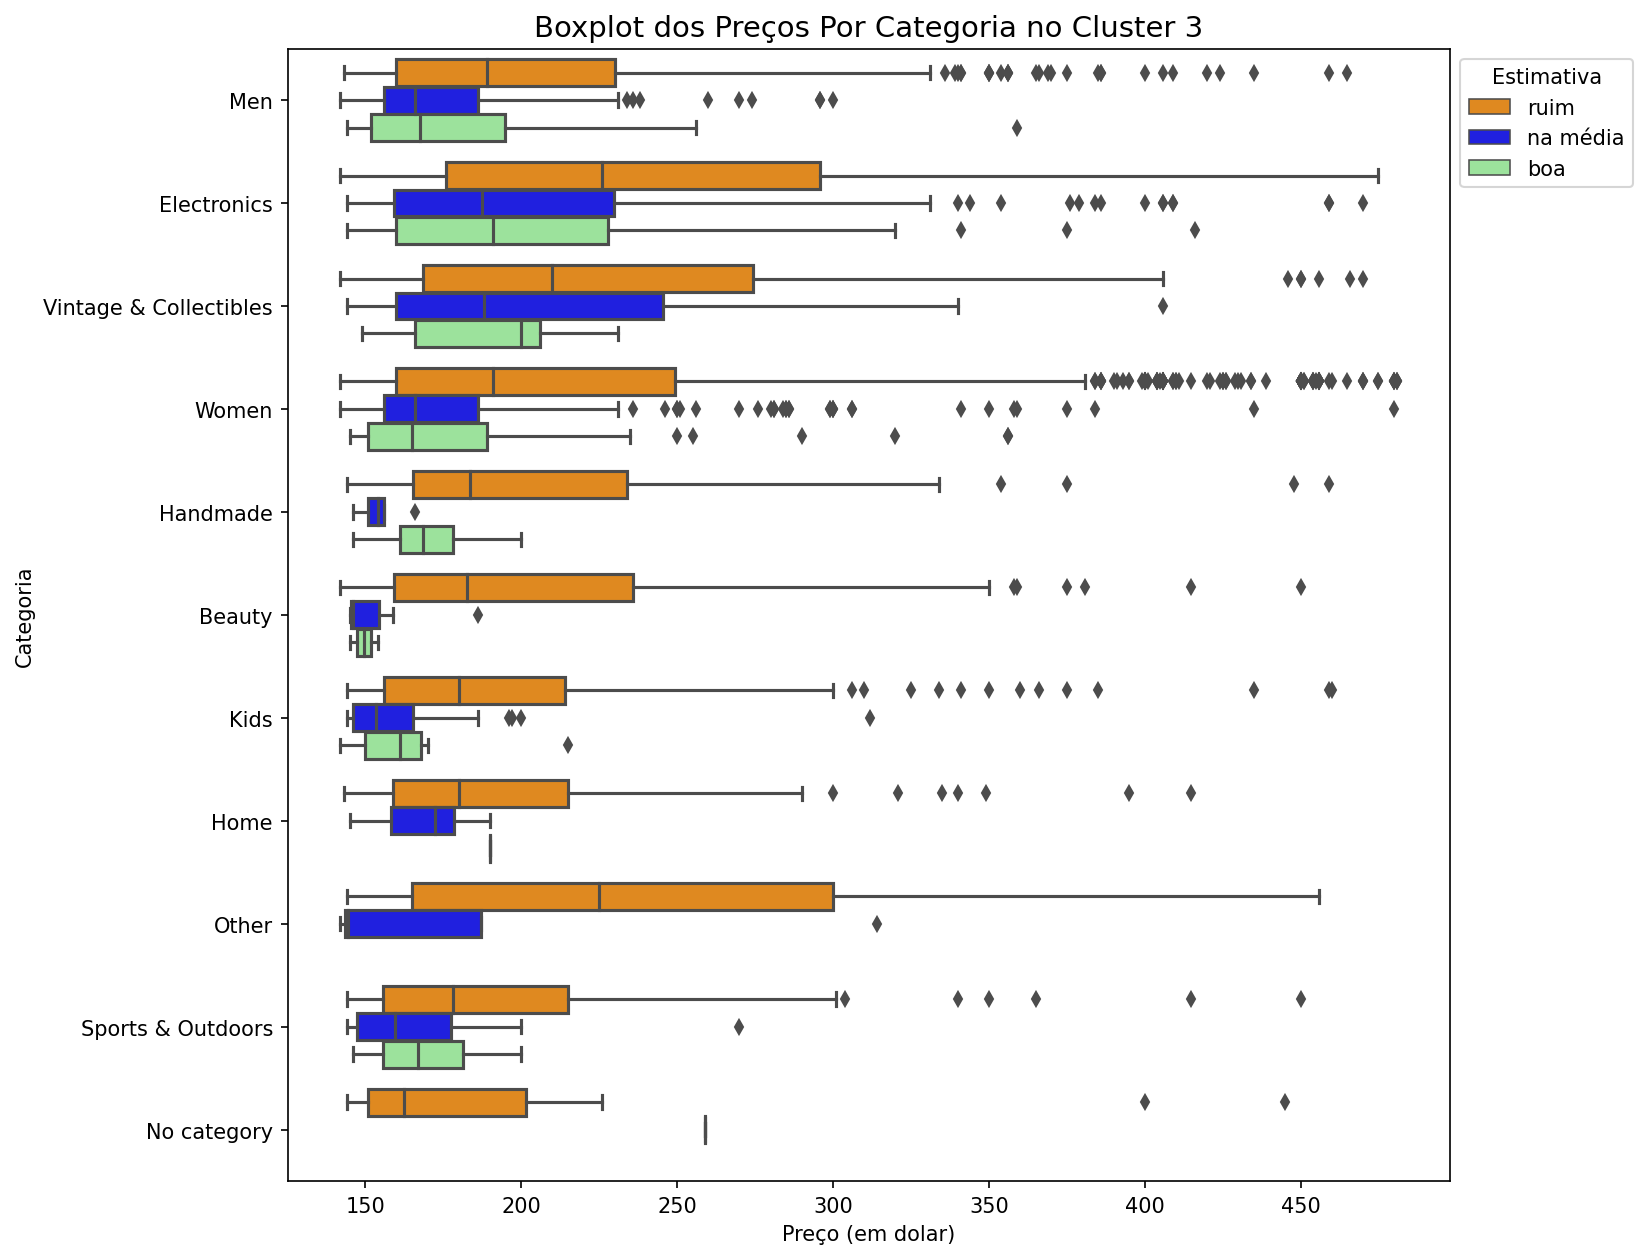

In [121]:
plt.figure(figsize=(10,10),dpi=150)
ax3 = sns.boxplot(x='price',y='category_1',data=teste[teste['cluster']==3],
            hue='estimativa',palette=['#ff8c00','#0000ff','#90ee90'])
ax3.set_title('Boxplot dos Preços Por Categoria no Cluster 3',fontsize=14)
ax3.set_xlabel('Preço (em dolar)')
ax3.set_ylabel('Categoria')
ax3.legend(title='Estimativa')
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

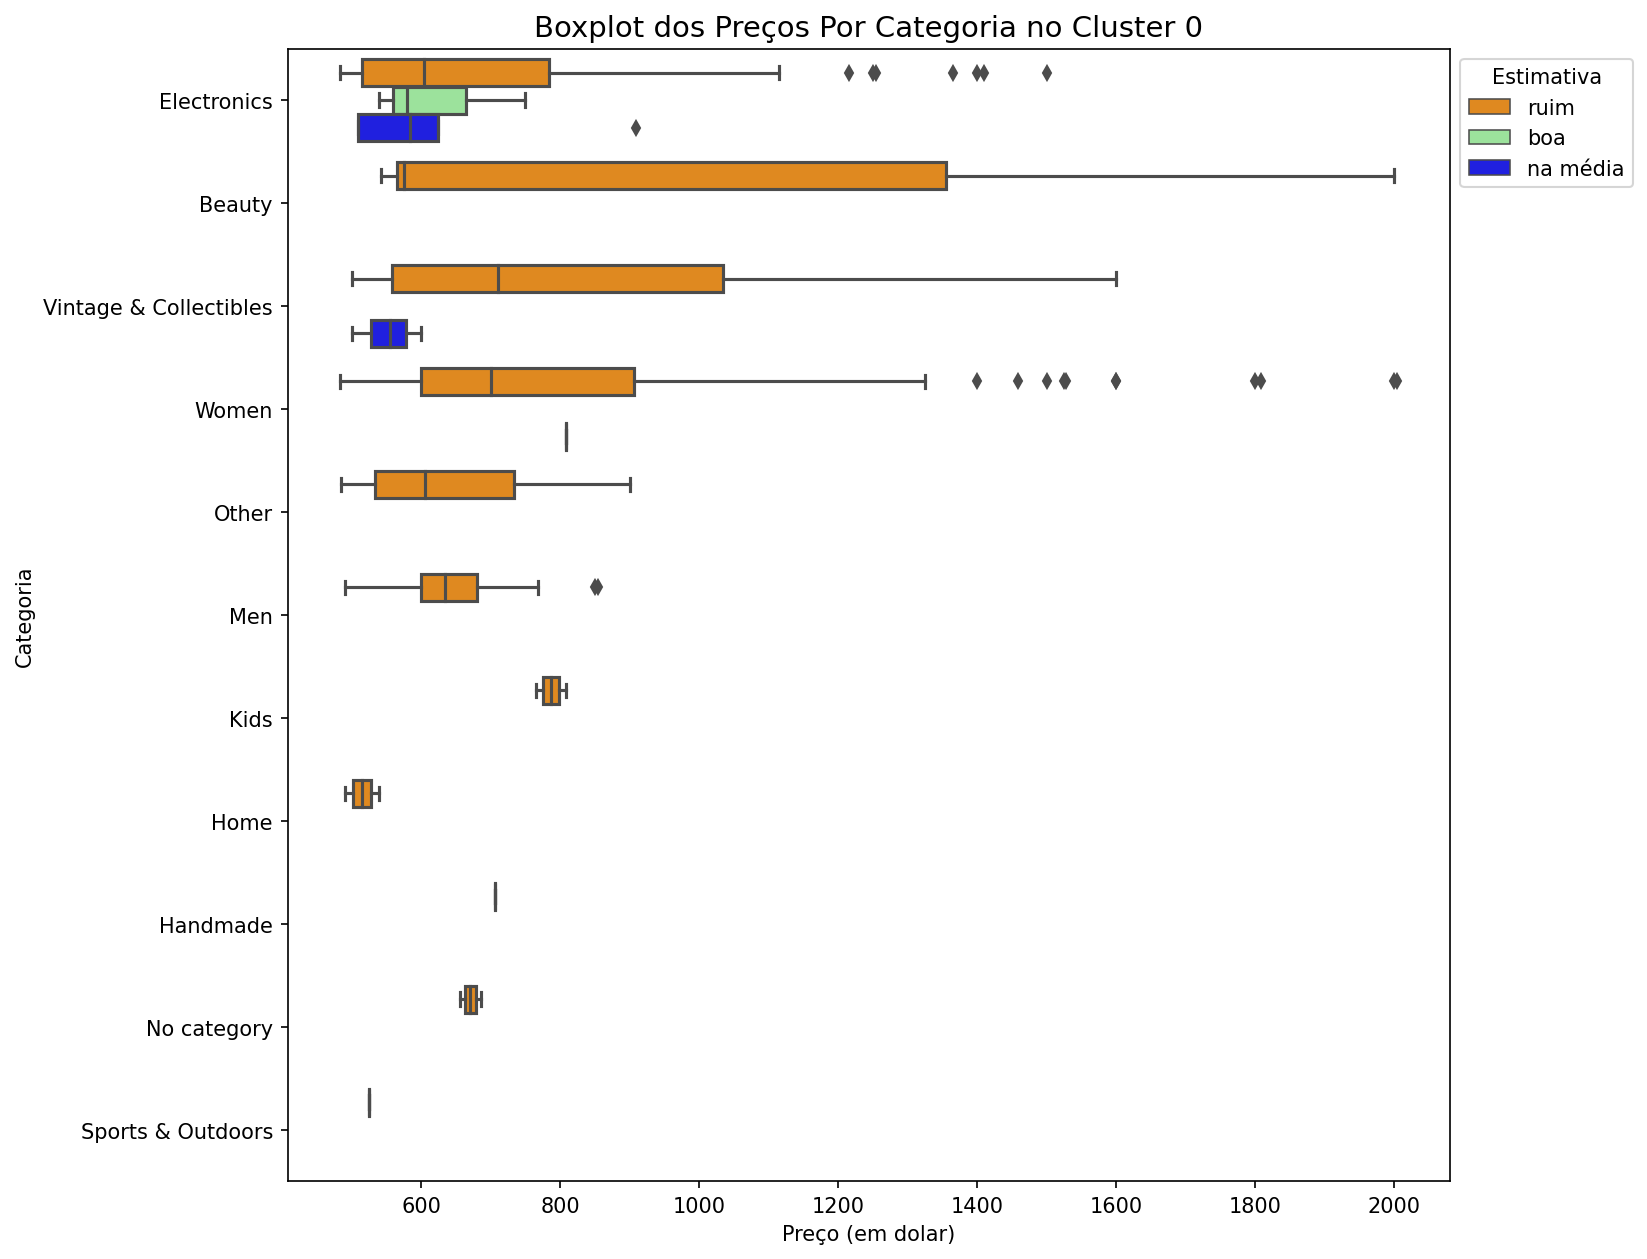

In [123]:
plt.figure(figsize=(10,10),dpi=150)
ax2 = sns.boxplot(x='price',y='category_1',data=teste[teste['cluster']==2],
            hue='estimativa',palette=['#ff8c00','#90ee90','#0000ff'])
ax2.set_title('Boxplot dos Preços Por Categoria no Cluster 0',fontsize=14)
ax2.set_xlabel('Preço (em dolar)')
ax2.set_ylabel('Categoria')
ax2.legend(title='Estimativa')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))